# <center> Numerical Physics with Probabilities: Uncertainty Estimates

    
    
<center> Department of Physics, University of Surrey module: Energy, Entropy and Numerical Physics (PHY2063)

## Table of Contents:

* [Numerical Physics part of Energy, Entropy and Numerical Physics](#EENP-intro)
* [An Introduction to Uncertainty Estimates](#uncertainty-intro)
* [The Simplest Uncertainty Estimates](#simple-uncertainty)
* [Resampling with the Bootstrap Method](#bootstrap)


#### Learning Objectives:
> Look at simplest uncertainty estimates, in a measurement

> Expose the assumptions in the simplest estimates and show what happens when they break down

> Show how a more sophisticated method for measuring uncertainty, bootstrap method, is more resistant to breaking down in the examples where our assumptions are wrong


## 1) Numerical Physics part of Energy, Entropy and Numerical Physics <a class="anchor" id="EENP-intro"></a>

This numerical physics course is part of the second-year
Energy, Entropy and Numerical Physics module.
It is online at the EENP module on SurreyLearn.
See there for assignments, deadlines etc.
The course is about numerically solving ODEs (ordinary differential equations) and
PDEs (partial differential equations), and introducing the (large)
part of numerical
physics where probabilities are used as well as some more general data analysis.

This assignment is on numerical physics of probabilities, and
looks at the Monte Carlo (MC) method, a section of fitting techniques and
at the Bayesian statistics approach to data analysis. 
It covers MC, uncertainty, fitting and Bayesian statistics, in that order, across 4 notebooks.


## 2) An Introduction to Uncertainty Estimates <a class="anchor" id="uncertainty-intro"></a>

This is the notebook on uncertainty estimates it will begin by showing how we can make basic uncertainty estimates in the very simple example of measurements in a quantity and how to use means and standard deviations to get uncertainty estimates. Then the underlying assumptions in this method are exposed using an example where the method falls over. The hope of this is that by demonstrating the limitations in the method you'll have a better appreciation of both error analysis in general and when it's appropriate to use the basic methods. Then you'll be introduced to the bootstrap method for resampling and seeing how using this can give better quality estimates.

Uncertainty estimates are an essential part of physics since whenever practical work is undertaken it will inevitably have limitations and thus you need to present an uncertainty in the value. This topic is also key since it underpins a lot of the work in the fitting section of the course, also it should serve as a nice introduction as you should be somewhat familiar with these concepts already from your lab work.


## 3) The Simplest Uncertainty Estimates <a class="anchor" id="simple-uncertainty"></a>

The first thing we are going to cover is simply finding the error in a measurement, when the error is random gaussian error. From your lab work you'll obviously be aware that the simplest way to do this is to take the reading multiple times and that if you increase n, the number of readings you take, then you'll return with a better estimate for the true value of the measured quantity. 

So to demonstrate this we will generate some points with gaussian error about the true value and then calculate our estimate for the true value as well as the uncertainty they produce.

You have come across probability before, for example, in quantum
physics, and in introductory data analysis. If you want a reminder/description
of what is meant by probability/randomness then the Wikipedia
Probability page is worth a look.

Note on math notation: We will working with probabilities,
these are dimensionless things between 0 and 1, where a probability of 0 means something
never-happens/is-impossible, and a probability of 1 means something
always-happens/is-certain-to-happen. We will also be working with
probability density functions, which in general have the dimension
of one over the variable they depend on, and vary from 0 to $\infty$.
For example, a probability density function for a variable $x$ which
has units of metres, $p(x)$, is defined so that the probability
that the variable $x$ lies between $x$ and $x+{\rm d}x$, is
$p(x){\rm d}x$. As $p(x){\rm d}x$ is a probability, it
is dimensionless and so $p(x)$ has dimensions of
m$^{-1}$ (${\rm d}x$ has dimensions of m).

The true value of X is 10.0
estimate for true value of X 10.0135  which is mean of measurements
standard deviation of X measurements  2.87042
uncertainty estimate for X measurements  0.0287
predict X in range  9.95609  to  10.07091
uncertainty estimate works :)


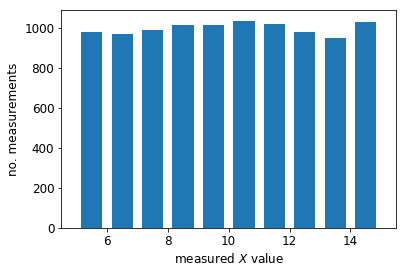

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# first define true value
x_true=10.0
print('The true value of X is',x_true)

# note that if n_pts is small, then uncertainty estimates are so
# broad that true value is included, but even then
# you should note that estimate is systematically too small
n_pts=10000

# Gaussian errors range of +-5 (tweak this see how it changes results)
errors = np.random.random(n_pts)*10 - 5

# Data set - array of measurements - (True value + errors as noise)
measurements = errors + x_true

# estimate mean
x_est=np.average(measurements)
print('estimate for true value of X',round(x_est,5),' which is mean of measurements')
x_std=np.std(measurements)
print('standard deviation of X measurements ',round(x_std,5))

# CLT estimate of uncertainty
uncertainty_est=x_std/np.sqrt(n_pts)
print('uncertainty estimate for X measurements ',round(uncertainty_est,5))
print('predict X in range ',round(x_est-2.0*uncertainty_est,5),' to ',round(x_est+2.0*uncertainty_est,5))
if(np.abs(x_true-x_est)<2.0*uncertainty_est):
    print('uncertainty estimate works :)')
else:
    print('uncertainty estimare failed :(')


# PLOT
hist_bins=np.arange(4.5,15.5,1)
plt.hist(measurements, rwidth=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('measured $X$ value',fontsize=12)
plt.ylabel('no. measurements',fontsize=12)
plt.xlim(4.5,15.5)
plt.show()

So what the above code block demonstrates is a standard calculation of the true value of a measured quantity based on repeating measurements with Gaussian error (or noise), then calculating the standard deviation in the measurements and from there calculating the uncertainty using:

<br>
<center>
Uncertainty = $\sigma/N^{1/2}$
</center>
    
We can then use this uncertainty estimate to see if our estimated value for the measurement falls within uncertainty of the true value. Using a large value of N reduces the uncertainty and it also allows us to have a better estimate of the value, in this example it is overwhelmingly likely that the uncertainty estimate will work.

I could go into deeper discussion of this topic but as this is the simplest example it is expected you should already be able to do this, for instance you should be using uncertainty analysis similar to this in many pieces of your lab work. However one key thing to note is that this isn't a flawless method and that it is based on several key assumptions we will discuss now.


### 3.1) Breaking the Basic Uncertainty Estimate

So we have seen that the above method is quite good as it works in the scenario that was presented. However it isn't particularly sophisticated and relies on several key assumptions meaning that for a system or measurement in which those assumptions don't hold true it is not an appropriate way to determine the uncertainty. This will now be exposed in the following example very similar to what we did above.

true value of X  10.0
estimate for true value of X 10.25209  which is mean of measurements
standard deviation of X measurements  248.37378
uncertainty estimate for X measurements  2.48374
predict X in range  5.28461  to  15.21956
uncertainty estimate works :)


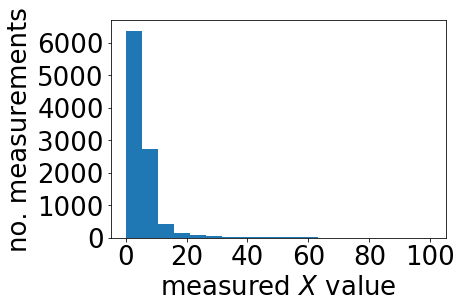

In [28]:
# first define true value
x_true=10.0
print('true value of X ',x_true)

# note that if n_pts is small, then uncertainty estimates are so
# broad that true value is included, but even then
# you should note that estimate is systematically too small
n_pts=10000


# alpha is Pareto distribution - Pareto is power law distribution
# https://en.wikipedia.org/wiki/Pareto_distribution
# note Python Pareto has x_m = 1 I think
# NOTE alpha must be > 1 !!
alpha=1.2

# add power law noise to true value of X    
x_measure = (np.random.pareto(alpha, size=n_pts)-alpha/(alpha-1.0) ) + x_true


# estimate mean
x_est=np.average(x_measure)
print('estimate for true value of X',round(x_est,5),' which is mean of measurements')
x_std=np.std(x_measure)
print('standard deviation of X measurements ',round(x_std,5))

# CLT estimate of uncertainty
uncertainty_est=x_std/np.sqrt(n_pts)
print('uncertainty estimate for X measurements ',round(uncertainty_est,5))
print('predict X in range ',round(x_est-2.0*uncertainty_est,5),' to ',round(x_est+2.0*uncertainty_est,5))
if(np.abs(x_true-x_est)<2.0*uncertainty_est):
    print('uncertainty estimate works :)')
else:
    print('uncertainty estimare failed :(')


#print(x_measure)
# PLOT
hist_bins=np.linspace(0.1,100.0,20)
plt.hist(x_measure,bins=hist_bins)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.xlabel('measured $X$ value',fontsize=26)
plt.ylabel('no. measurements',fontsize=26)
plt.show()

There is a very key difference here between this example and the first one we did, the key difference is that in the first example the noise (error) was Gaussian whereas in this example it follows Pareto distribution (often referred to as the 80-20 rule) which is a power law distribution. What this means is that the results are disproportionately skewed towards the lower x values and this can be seen in that it gives us an estimated x value that is too low compared to the true value of x.

What this demonstrates is that the only time we can use such a basic technique to determine uncertainty is for very simple data which has Gaussian error. If our data has errors that follow a more complex distribution such as a power law like in the second example with the Pareto distribution defining the noise then we need a different method to determine the uncertainty. It is worth noting that by playing around with the alpha value you can change how the Pareto distribution appears and so if you adjust it to alpha=6 then the uncertainty estimate typically works, additionally bear in mind that it is a statistical model and so sometimes it may work/not work.
 
### 4) Resampling with the Bootstrap Method <a class="anchor" id="bootstrap"></a>

The first thing to know in order to understand the bootstrap method is what is meant by resampling. Resampling is a technique that is used in statestics to improve the quality of estimates in a dataset by drawing out other samples. So in a dataset of 10 points it will draw out a smaller sample of those 10 (or all 10) and use that as the data upon which it will perform it's calculation, it then does this N times and the average of these results is (hopefully) a better estimate than if it just did one calculation on the entire sample.

You can read more about resampling at https://en.wikipedia.org/wiki/Resampling_(statistics). The specific method that we are going to be employing is the bootstrap method which is one of the most widely used resampling methods along side the jackknife method. The wikipedia page to explain the method is https://en.wikipedia.org/wiki/Bootstrapping_(statistics) Additionally there is an old but excellent paper on the method at https://statistics.stanford.edu/sites/g/files/sbiybj6031/f/BIO%2083.pdf which I highly recommend reading for more insight on the topic.

Now we are going to employ the bootstrap method to determine the uncertainty and give us a prediction for the value of X and we can see how it compares to the basic method we used above on the same example of a Pareto distribution.

In [5]:
# implement bootstrap method of resampling here so for better error apprx.
def bootstrap_calc(x,prob_conf_interval):
    ''' here I have set the number of times the resampled to 1000, this kind of overkill - making it 100 does not change the
    error estimates much - but as the program runs so quickly it would not run noticeably faster if n_bootstrap
    is reduced so might as well make n_bootstrap large'''
    
    n_bootstrap = 1000
    n_pts = len(x)
    x_vals = np.zeros(n_bootstrap)
    
    for i in range(0,n_bootstrap):
        x_boot=np.zeros(n_pts)
        for j in range(0,n_pts):
            i_sample=np.random.randint(0,n_pts-1)
            x_boot[j]=x[i_sample]
        x_vals[i] = np.mean(x_boot)
        
# sort so later we pick out values near bottom and top
    x_vals = np.sort(x_vals)
    
# now n_bootstrap values are sorted from smallest to largest
    f_lower=(1.0-prob_conf_interval)/2.0
    f_upper=1.0-f_lower
    print('lower and upper limits to confidence interval ',format(f_lower,"4.2f"),'&',format(f_upper,"4.2f"))
    
# 95% level confidence - 95% is just a reasonable but basically arbitrary choice
    n_boot_lower_conf=int(float(n_bootstrap)*f_lower)
    n_boot_upper_conf=int(float(n_bootstrap)*f_upper)
    min_x_val = x_vals[n_boot_lower_conf]
    max_x_val = x_vals[n_boot_upper_conf]
    
    return (min_x_val, x_vals, max_x_val)

In [33]:
# Bootstrap estimates for statistical error bounds
# making this closer to 1 makes interval larger - more conservative error estimates
prob_conf_interval=0.95
print('estimate that',format(prob_conf_interval*100.0,"4.1f"),'% of the bootstrap sampled values fall with the confidence interval')

#min_x_val, x_vals, max_x_val = bootstrap_calc(x_measure,prob_conf_interval)
min_x_val, x_vals, max_x_val = bootstrap_calc(measurements,prob_conf_interval)

est_x_val = np.mean(x_vals)

print('')
print('after boootstrap error analysis the data constrains the value of x to ranges:')
print('best fit value of x ',format(est_x_val,"5.2f"),format(prob_conf_interval*100.0,"5.1f"),
      '% conf. interval ',format(min_x_val,"5.2f"),' to ',format(max_x_val,"5.2f"))

#
print('compare to known true value of x ',format(x_true,"5.2f"))


if (min_x_val <= x_true <= max_x_val):
    print('uncertainty estimate works :)')
else:
    print('uncertainty estimare failed :(')

estimate that 95.0 % of the bootstrap sampled values fall with the confidence interval
lower and upper limits to confidence interval  0.03 & 0.97

after boootstrap error analysis the data constrains the value of x to ranges:
best fit value of x  10.01  95.0 % conf. interval   9.96  to  10.07
compare to known true value of x  10.00
uncertainty estimate works :)


So what you should see from this is that it doesn't give a hugely different result from doing it with the original method and this is to be expected, we also see that it gives a relatively poor estimatate for the power law which again we would expect since just taking the mean of all the values is a poor approximation for a power law. 

However, what you hopefully will see is that this method IS far more likely to contain the true value of x within our 95% confidence interval (granted since this is a psuedo random process sometimes it won't be but in my anecdotal testing it seemed about 60% likely to). Therefore it is a slight improvement on the basic method which 'never' gets the true value within its uncertainty estimate.

This is only one use of the bootstrap method and we will use it more (and more effectively) in the next section of the course, fitting!